In [1]:
import cv2 as cv2
import pandas as pd
import os
import matplotlib.pyplot as plt
import math
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
def insertGambar(folder):
    images = []
    filenames = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        filenames.append(filename)
        if img is not None:
            images.append(img)
    return images, filenames

def tampilFoto(img):
    plt.figure(figsize=(20,20))
    for i in range(len(img)):
        plt.subplot(1,len(img),i+1)
        plt.imshow(img[i], cmap='gray')
def bright(citra,jumlah):
    citra[citra<255]+=jumlah
    return citra

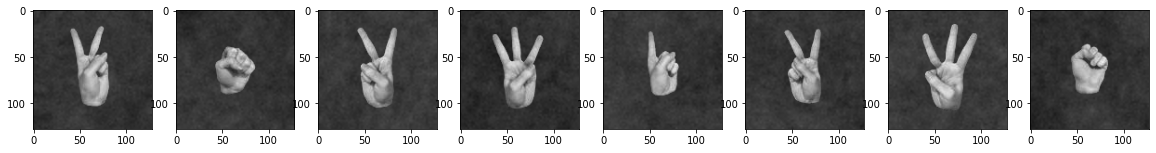

In [3]:
tampil = []
label = []
foto,filenames = insertGambar("Dataset")
for filename in filenames:
    label.append(filename[37])
tampilFoto(foto[:8])

In [4]:
terang = []
for img in foto:
    terang.append(bright(img,20))

In [5]:
foto = terang

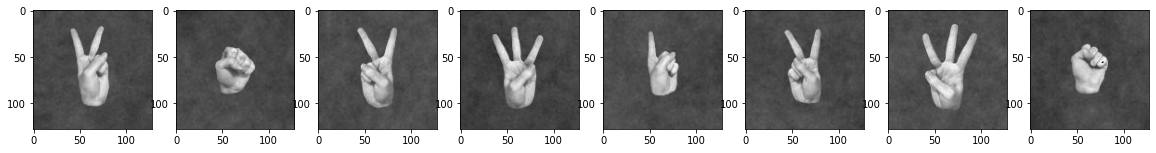

In [6]:
tampilFoto(terang[:8])

In [7]:
gray = []
for img in foto:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray.append(img)

tampilFoto(gray[:8])

In [8]:
tresh = []
for img in gray:
    _,thr = cv2.threshold(img,125,255,cv2.THRESH_BINARY)
    tresh.append(thr)
tampilFoto(tresh[:8])

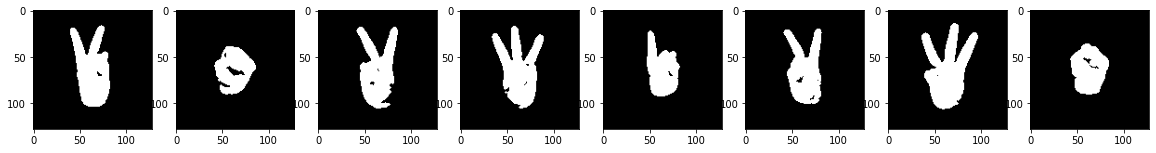

In [9]:
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
morp = []
for img in tresh:
    img = cv2.dilate(img,kernel2)
    morp.append(img)
tampilFoto(morp[:8])

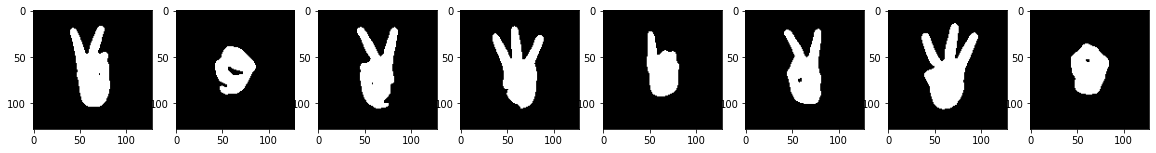

In [10]:
blur = []
for img in morp:
    blur.append(cv2.medianBlur(img,5))
tampilFoto(blur[:8])

In [11]:
foto = morp
h0s = []
h1s = []
h2s = []
h3s = []
h4s = []
h5s = []
h6s = []

huMoments = []
for img in foto:
    moments = cv2.moments(img)
    huMoment = cv2.HuMoments(moments)
    huMoments.append(huMoment)
logScales = []
print(len(huMoments),len(foto))
for momen in huMoments:
    logScale = []
    for i in range (0,7):
        logScale.append(-1* math.copysign(1.0,momen[i])*math.log10(abs(momen[i])))
    h0, h1, h2, h3, h4, h5, h6 = logScale
    h0s.append(h0)
    h1s.append(h1)
    h2s.append(h2)
    h3s.append(h3)
    h4s.append(h4)
    h5s.append(h5)
    h6s.append(h6)

1000 1000


In [12]:
d = {'Filename': filenames, 'h0': h0s, 'h1': h1s, 'h2': h2s,'h3': h3s, 'h4': h4s,'h5': h5s,'h6':h6s,'label':label}
df = pd.DataFrame(data=d)
df.to_csv("Finger.csv")
finger = df

In [13]:
finger[:8]

Filename        h0        h1         h2  \
0  000cac8e-fcf0-4f8c-bd16-c257d1e6d7a8_2L.png  3.000350  6.353452  11.236659   
1  000d9961-8136-4dee-9820-86e178777958_0L.png  3.128801  7.517215  10.933533   
2  001cddc6-e29c-44da-82d5-bd00ec215f07_2R.png  2.965979  6.331818  10.913621   
3  001e18d6-4632-4876-a922-7b4ead742070_3L.png  3.012856  6.571917  10.180117   
4  002a1af0-8700-47df-b4e0-ef18ffde24de_1L.png  3.061989  6.618382   9.912048   
5  002bed28-19ae-4b57-981e-2d047d83d4f6_2R.png  2.982016  6.379618  12.188604   
6  002d915d-68ce-4ed7-a9ea-76731669ef9f_3R.png  3.017694  6.636486  10.190231   
7  002eb218-7475-43d0-bd90-bbbe055e3937_0L.png  3.157388  7.322103  11.269796   

          h3         h4         h5         h6 label  
0  10.523230  21.665405  13.711035 -21.480289     2  
1  12.092916  23.607284  15.893603 -24.746055     0  
2  10.280780 -20.881850  13.449124 -21.754460     2  
3  10.866880 -21.427366  14.152904 -21.792964     3  
4  10.371582  20.513407  13.728448 -22.690737     1  
5  10.214914  21.766555  13.404877  21.465028     2  
6  10.709100 -21.369476  14.030071  21.262201     3  
7  13.590193 -26.274019 -17.251292  26.100983     0

In [14]:
# del finger['index']
finger = pd.read_csv("Finger.csv")
del finger ['Unnamed: 0']
del finger['Filename']
finger[:8]
# finger

h0        h1         h2         h3         h4         h5         h6  \
0  3.000350  6.353452  11.236659  10.523230  21.665405  13.711035 -21.480289   
1  3.128801  7.517215  10.933533  12.092916  23.607284  15.893603 -24.746055   
2  2.965979  6.331818  10.913621  10.280780 -20.881850  13.449124 -21.754460   
3  3.012856  6.571917  10.180117  10.866880 -21.427366  14.152904 -21.792964   
4  3.061989  6.618382   9.912048  10.371582  20.513407  13.728448 -22.690737   
5  2.982016  6.379618  12.188604  10.214914  21.766555  13.404877  21.465028   
6  3.017694  6.636486  10.190231  10.709100 -21.369476  14.030071  21.262201   
7  3.157388  7.322103  11.269796  13.590193 -26.274019 -17.251292  26.100983   

   label  
0      2  
1      0  
2      2  
3      3  
4      1  
5      2  
6      3  
7      0

In [15]:
view = finger.head(8)
view.plot(x='label',
        kind='bar',
        stacked=False,
        title='Nilai moment invariant',
        figsize=(10,4))
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

In [16]:
# finger.shape
x = finger.iloc[:, :7].values
y = finger['label'].values
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2, random_state=42)

In [17]:
def distance(pa,pb):
    return np.sum((pa-pb)**2)**0.5

In [18]:
def KNN(x, y, x_query, k=5):
    m = x.shape[0]
    
    distances = []
    
    for i in range(m):
        dis = distance(x_query, x[i]) 
        distances.append((dis, y[i]))

    distances = sorted(distances)
    distances = distances[:k]
    distances = np.array(distances)
    labels = distances[:, 1]
    uniq_label, counts = np.unique(labels, return_counts=True)
    pred = uniq_label[counts.argmax()]
    
    return pred

In [19]:
KNNprediction = []
for i in range(200):
    p = KNN(x_train, y_train, x_test[i], k=3)
    KNNprediction.append(p)
    
KNNpredictions = np.array(KNNprediction)
KNNAccuracy= (y_test[:1000] == KNNpredictions).sum()/len(KNNpredictions)
print("Accuracy : ", KNNAccuracy)
# test = np.array(y_test)

Accuracy :  0.98


In [20]:
test = np.array(y_test)

In [21]:
KNNhasil = []
for i in range(200):
    if test[i]==KNNpredictions[i]:
        KNNhasil.append("benar")
    else:
        KNNhasil.append("salah")

In [22]:
KNNpredictions = KNNpredictions.astype(int)

In [23]:
KNN = {'Real': test, 'KNN Pred' : KNNpredictions, 'Hasil KNN':KNNhasil}
dataKNN = pd.DataFrame(data=KNN)
dataKNN.to_csv('Hasil Test KNN.csv')

In [24]:
print(classification_report(y_test, KNNpredictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        26
           2       0.95      0.95      0.95        38
           3       0.94      0.94      0.94        36
           4       1.00      1.00      1.00        35
           5       1.00      1.00      1.00        29

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



In [25]:
from sklearn.naive_bayes import GaussianNB
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive Bayes
modelnb = GaussianNB()
# Memasukkan data training pada fungsi klasifikasi Naive Bayes
nbtrain = modelnb.fit(x_train, y_train)

In [26]:
y_pred = nbtrain.predict(x_test)

In [27]:
y_pred

array([4, 3, 1, 1, 4, 3, 0, 0, 4, 5, 3, 4, 2, 0, 4, 1, 0, 0, 0, 3, 2, 3,
       0, 3, 3, 4, 5, 1, 1, 5, 4, 3, 3, 4, 5, 1, 2, 4, 1, 0, 4, 0, 2, 5,
       2, 4, 2, 5, 0, 1, 2, 2, 5, 0, 5, 3, 2, 1, 3, 4, 3, 1, 0, 2, 4, 3,
       4, 3, 5, 4, 2, 3, 2, 2, 5, 2, 3, 4, 3, 0, 0, 3, 4, 0, 4, 2, 5, 4,
       4, 4, 4, 0, 3, 3, 3, 3, 5, 4, 3, 1, 5, 3, 2, 1, 2, 0, 2, 0, 0, 3,
       4, 0, 0, 0, 4, 2, 3, 4, 0, 1, 1, 5, 3, 5, 0, 5, 2, 1, 5, 3, 5, 2,
       0, 5, 3, 4, 3, 3, 5, 4, 1, 5, 2, 0, 4, 4, 0, 5, 1, 3, 2, 2, 0, 4,
       2, 1, 2, 0, 4, 1, 1, 0, 1, 3, 5, 3, 3, 5, 3, 2, 1, 5, 0, 0, 5, 1,
       4, 5, 0, 1, 4, 5, 2, 2, 4, 4, 3, 2, 3, 3, 0, 3, 1, 2, 3, 1, 2, 5,
       0, 0], dtype=int64)

In [28]:
BayesPredictions = np.array(y_pred)
BayesAccuracy = (y_test[:1000] == BayesPredictions).sum()/len(BayesPredictions)
print("Accuracy : ", BayesAccuracy)

Accuracy :  0.97


In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        26
           2       1.00      0.84      0.91        38
           3       0.88      1.00      0.94        36
           4       0.97      1.00      0.99        35
           5       1.00      1.00      1.00        29

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



In [30]:
hasilBayes = []
for i in range(200):
    if y_test[i]==y_pred[i]:
        hasilBayes.append("benar")
    else:
        hasilBayes.append("salah")

In [31]:
bd = {'Real':y_test, 'Bayes Pred':y_pred, 'HasilBayes':hasilBayes}
BayesData = pd.DataFrame(data=bd)
BayesData.to_csv('Hasil Test Bayes.csv')

In [32]:
dataKNN.head()

Real  KNN Pred Hasil KNN
0     4         4     benar
1     3         2     salah
2     1         1     benar
3     1         1     benar
4     4         4     benar

In [33]:
BayesData.head()

Real  Bayes Pred HasilBayes
0     4           4      benar
1     3           3      benar
2     1           1      benar
3     1           1      benar
4     4           4      benar

In [34]:
del BayesData['Real']
KNNdanBayes = pd.concat([dataKNN, BayesData], axis=1)

In [35]:
KNNdanBayes.to_csv('Hasil Test Bayes dan KNN.csv')

In [36]:
KNNdanBayes

Real  KNN Pred Hasil KNN  Bayes Pred HasilBayes
0       4         4     benar           4      benar
1       3         2     salah           3      benar
2       1         1     benar           1      benar
3       1         1     benar           1      benar
4       4         4     benar           4      benar
..    ...       ...       ...         ...        ...
195     1         1     benar           1      benar
196     2         2     benar           2      benar
197     5         5     benar           5      benar
198     0         0     benar           0      benar
199     0         0     benar           0      benar

[200 rows x 5 columns]